In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv('Placement_Data_Full_Class.csv')
df.head(90)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.00,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.50,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.00,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.80,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,F,83.84,Others,89.83,Others,Commerce,77.20,Comm&Mgmt,Yes,78.74,Mkt&Fin,76.18,Placed,400000.0
86,87,M,62.00,Others,63.00,Others,Commerce,64.00,Comm&Mgmt,No,67.00,Mkt&Fin,57.03,Placed,220000.0
87,88,M,59.60,Central,51.00,Central,Science,60.00,Others,No,75.00,Mkt&HR,59.08,Not Placed,NaN
88,89,F,66.00,Central,62.00,Central,Commerce,73.00,Comm&Mgmt,No,58.00,Mkt&HR,64.36,Placed,210000.0


In [3]:
df.info() #check for info of data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [4]:
#separating numerical and categorical variables

cat_var=list(df.select_dtypes(include=['object']).columns)
num_var=list(df.select_dtypes(include=['int32','int64','float32','float64']).columns)

print(cat_var,num_var)

['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation', 'status'] ['sl_no', 'ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']


In [5]:
#check for null values
df.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [6]:
#Handle Null Values

In [7]:
df.shape

(215, 15)

In [8]:

#visualizing the data while filling and selecting null values criteria
def plot_disp(col):
    plt.figure(figsize=(15,7))
    sn.distplot(df['salary'],kde=True,hist=False,label=' True Salary',color='red')
    sn.distplot(df[col],kde=True,hist=False,label=col,color='blue')

In [9]:
most_freq=list(dict(df['salary'].value_counts()).items())[0]

print(most_freq)

(300000.0, 22)


In [10]:
#create 3 news column filling with the mean values for comparison in plot_disp function

df['salary_mean']=df['salary'].fillna(df['salary'].mean())
df['salary_median']=df['salary'].fillna(df['salary'].median())
df['salary_mode']=df['salary'].fillna(df['salary'].mode()[0])

In [11]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary,salary_mean,salary_median,salary_mode
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0,270000.000000,270000.0,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0,200000.000000,200000.0,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0,250000.000000,250000.0,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN,288655.405405,265000.0,300000.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0,425000.000000,425000.0,425000.0


In [12]:
col_list=['salary_mean','salary_median','salary_mode']

# plotting each column comparison...

/var/folders/gg/tysxrr0x0tj9nm9r1ndfsvs40000gn/T/ipykernel_57454/1837314206.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(df['salary'],kde=True,hist=False,label=' True Salary',color='red')
/var/folders/gg/tysxrr0x0tj9nm9r1ndfsvs40000gn/T/ipykernel_57454/1837314206.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de441

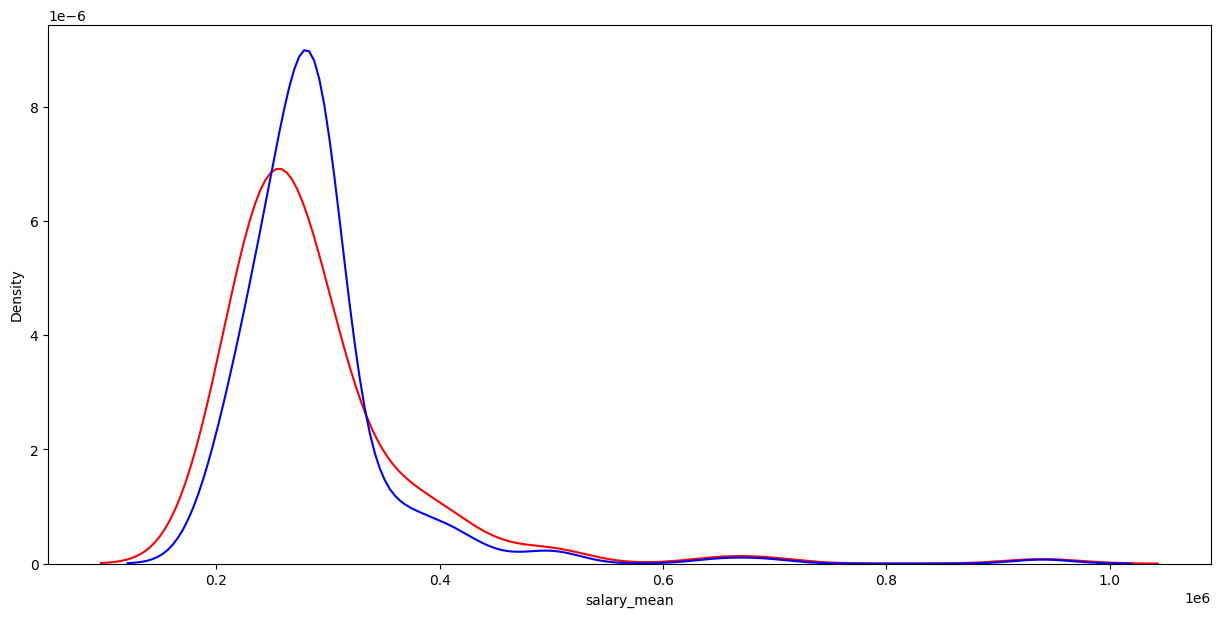

In [13]:
plot_disp(col_list[0])

/var/folders/gg/tysxrr0x0tj9nm9r1ndfsvs40000gn/T/ipykernel_57454/1837314206.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(df['salary'],kde=True,hist=False,label=' True Salary',color='red')
/var/folders/gg/tysxrr0x0tj9nm9r1ndfsvs40000gn/T/ipykernel_57454/1837314206.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de441

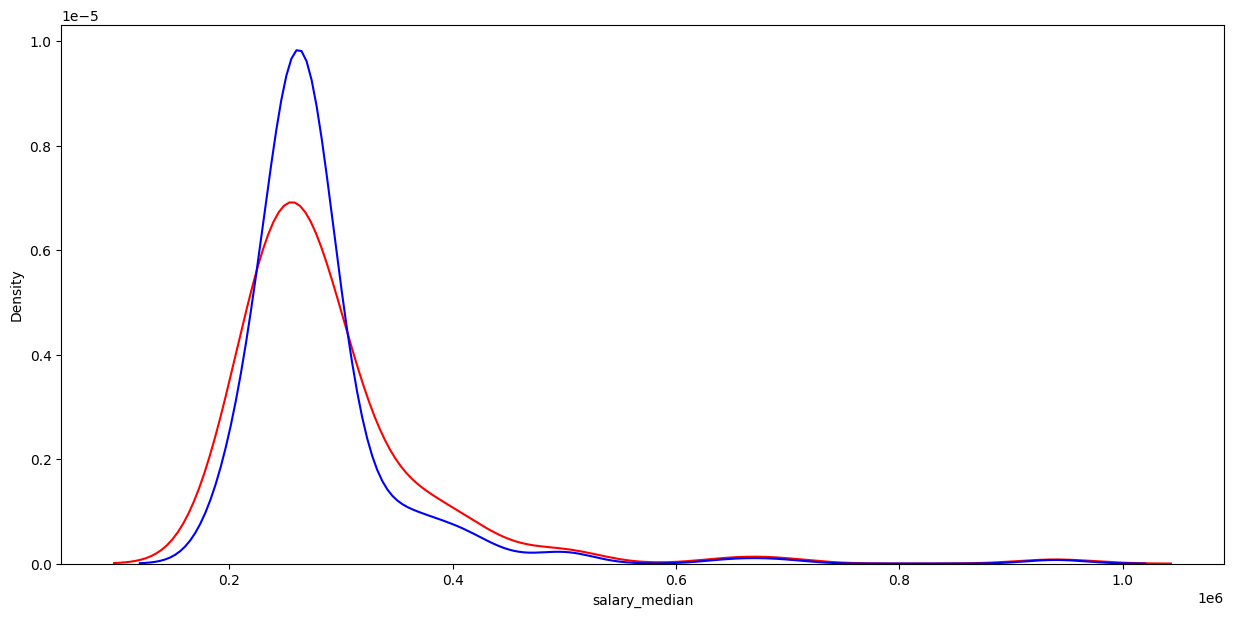

In [14]:
plot_disp(col_list[1])

/var/folders/gg/tysxrr0x0tj9nm9r1ndfsvs40000gn/T/ipykernel_57454/1837314206.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(df['salary'],kde=True,hist=False,label=' True Salary',color='red')
/var/folders/gg/tysxrr0x0tj9nm9r1ndfsvs40000gn/T/ipykernel_57454/1837314206.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de441

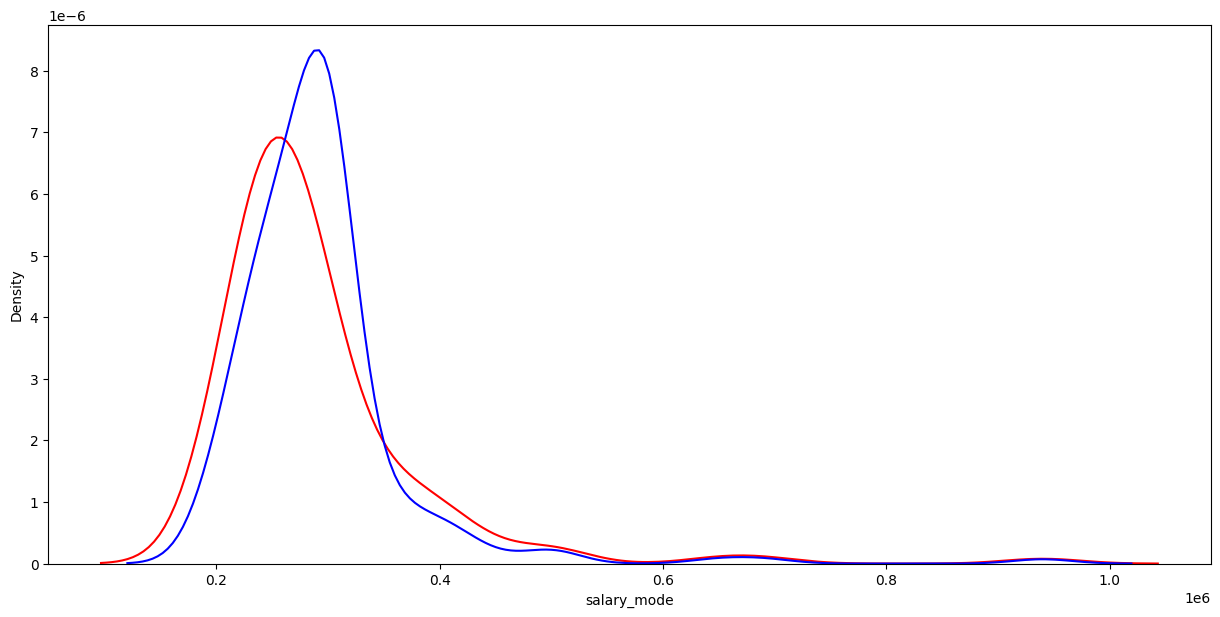

In [15]:
plot_disp(col_list[2])

In [16]:
#least fluctuating is mean from analysis, can't take mode as 67 null values..


In [17]:
df['salary']=df['salary'].fillna(df['salary'].mean())
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary,salary_mean,salary_median,salary_mode
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.000000,270000.000000,270000.0,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.000000,200000.000000,200000.0,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.000000,250000.000000,250000.0,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,288655.405405,288655.405405,265000.0,300000.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.000000,425000.000000,425000.0,425000.0


In [18]:
df=df.drop(columns=['salary_mean','salary_median','salary_mode'])
df.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

##### sn.countplot(df['status'],palette='Set2')

In [19]:
print(cat_var)

['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation', 'status']


Count Plot for feature gender is :


/var/folders/gg/tysxrr0x0tj9nm9r1ndfsvs40000gn/T/ipykernel_57454/1522686706.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sn.countplot(df[col],palette='Set2')


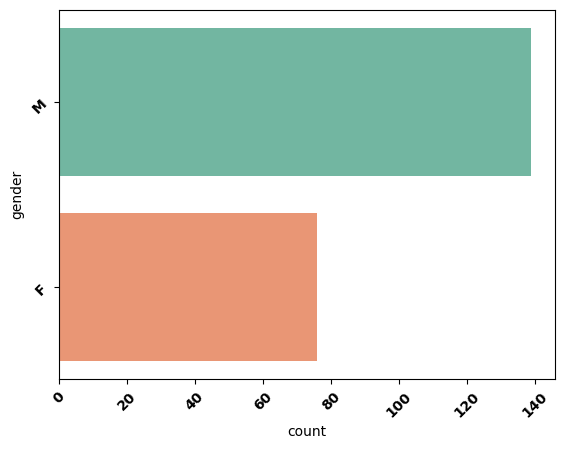

Count Plot for feature ssc_b is :


/var/folders/gg/tysxrr0x0tj9nm9r1ndfsvs40000gn/T/ipykernel_57454/1522686706.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sn.countplot(df[col],palette='Set2')


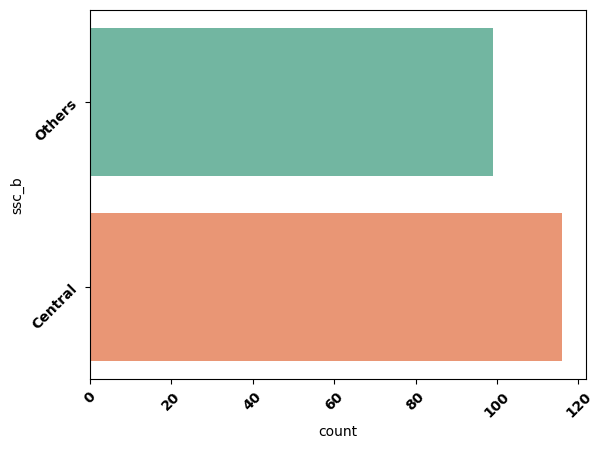

Count Plot for feature hsc_b is :


/var/folders/gg/tysxrr0x0tj9nm9r1ndfsvs40000gn/T/ipykernel_57454/1522686706.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sn.countplot(df[col],palette='Set2')


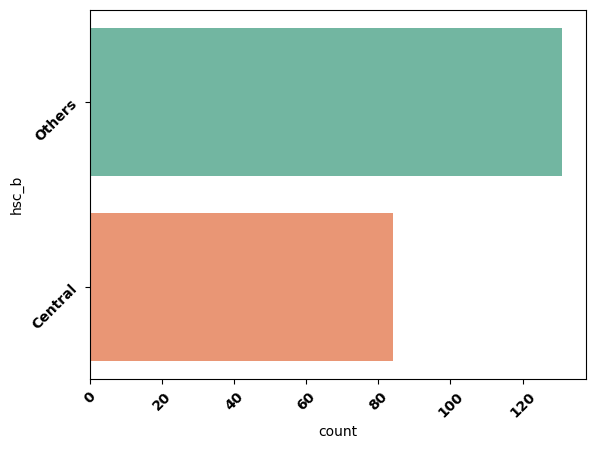

Count Plot for feature hsc_s is :


/var/folders/gg/tysxrr0x0tj9nm9r1ndfsvs40000gn/T/ipykernel_57454/1522686706.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sn.countplot(df[col],palette='Set2')


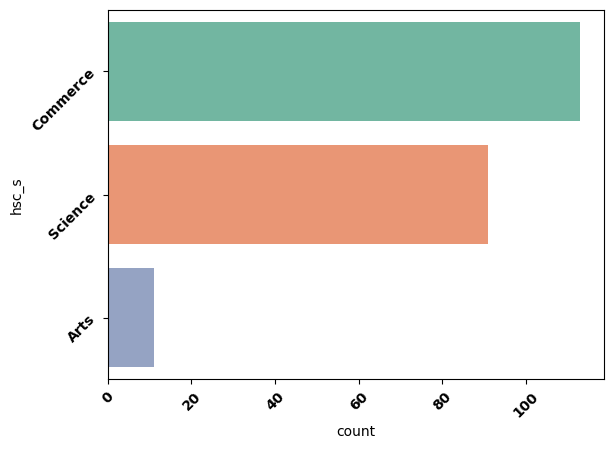

Count Plot for feature degree_t is :


/var/folders/gg/tysxrr0x0tj9nm9r1ndfsvs40000gn/T/ipykernel_57454/1522686706.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sn.countplot(df[col],palette='Set2')


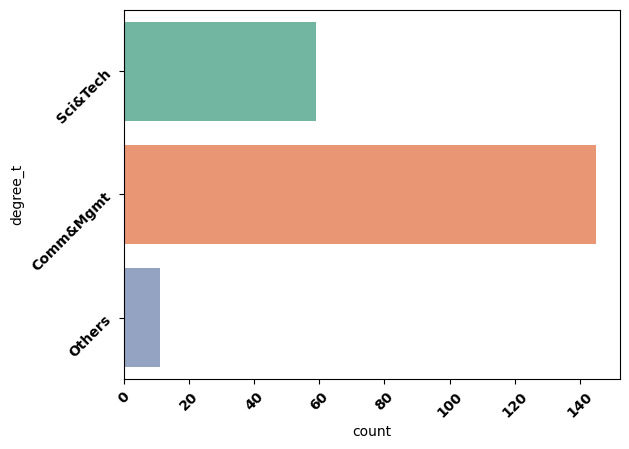

Count Plot for feature workex is :


/var/folders/gg/tysxrr0x0tj9nm9r1ndfsvs40000gn/T/ipykernel_57454/1522686706.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sn.countplot(df[col],palette='Set2')


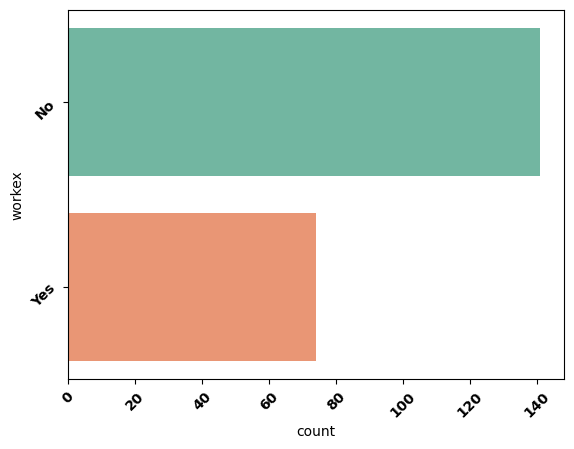

Count Plot for feature specialisation is :


/var/folders/gg/tysxrr0x0tj9nm9r1ndfsvs40000gn/T/ipykernel_57454/1522686706.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sn.countplot(df[col],palette='Set2')


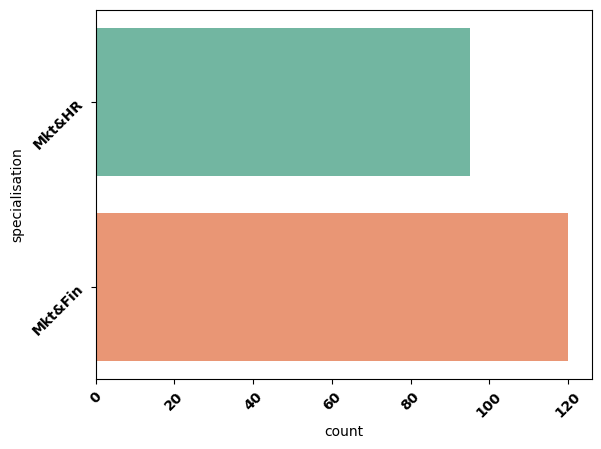

Count Plot for feature status is :


/var/folders/gg/tysxrr0x0tj9nm9r1ndfsvs40000gn/T/ipykernel_57454/1522686706.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sn.countplot(df[col],palette='Set2')


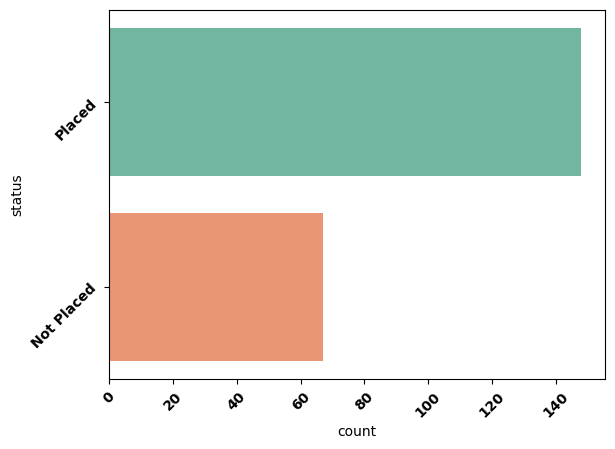

In [20]:
def valuecount(col):
    return dict(df[col].value_counts())

def getcountplot(col):
    sn.countplot(df[col],palette='Set2')
    plt.xticks(rotation=45,fontweight='bold',fontsize='10')
    plt.yticks(rotation=45,fontweight='bold',fontsize='10')
    plt.show()

for col in cat_var:
    print(f'Count Plot for feature {col} is :')
    getcountplot(col)
    print('='*75)

In [21]:
getfinaldict={}
for col in cat_var:
    getfinaldict[col]=valuecount(col)

for i in getfinaldict.items():
    print(i)

('gender', {'M': 139, 'F': 76})
('ssc_b', {'Central': 116, 'Others': 99})
('hsc_b', {'Others': 131, 'Central': 84})
('hsc_s', {'Commerce': 113, 'Science': 91, 'Arts': 11})
('degree_t', {'Comm&Mgmt': 145, 'Sci&Tech': 59, 'Others': 11})
('workex', {'No': 141, 'Yes': 74})
('specialisation', {'Mkt&Fin': 120, 'Mkt&HR': 95})
('status', {'Placed': 148, 'Not Placed': 67})


In [22]:
df[(df['degree_t']=='Sci&Tech')&(df['status']=='Placed')].sort_values(by='salary',ascending=False).reset_index().head(5)

,index,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,150,151,M,71.00,Central,58.66,Central,Science,58.00,Sci&Tech,Yes,56.0,Mkt&Fin,61.30,Placed,690000.0
1,77,78,M,64.00,Others,80.00,Others,Science,65.00,Sci&Tech,Yes,69.0,Mkt&Fin,57.65,Placed,500000.0
2,163,164,M,63.00,Others,67.00,Others,Science,64.00,Sci&Tech,No,75.0,Mkt&Fin,66.46,Placed,500000.0
3,174,175,M,73.24,Others,50.83,Others,Science,64.27,Sci&Tech,Yes,64.0,Mkt&Fin,66.23,Placed,500000.0
4,53,54,M,80.00,Others,70.00,Others,Science,72.00,Sci&Tech,No,87.0,Mkt&HR,71.04,Placed,450000.0


In [23]:
df[(df['degree_t']=='Comm&Mgmt')&(df['status']=='Placed')].sort_values(by='salary',ascending=False).reset_index().head(5)

,index,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,119,120,M,60.8,Central,68.4,Central,Commerce,64.6,Comm&Mgmt,Yes,82.66,Mkt&Fin,64.34,Placed,940000.0
1,177,178,F,73.0,Central,97.0,Others,Commerce,79.0,Comm&Mgmt,Yes,89.00,Mkt&Fin,70.81,Placed,650000.0
2,4,5,M,85.8,Central,73.6,Central,Commerce,73.3,Comm&Mgmt,No,96.80,Mkt&Fin,55.50,Placed,425000.0
3,95,96,M,73.0,Central,78.0,Others,Commerce,65.0,Comm&Mgmt,Yes,95.46,Mkt&Fin,62.16,Placed,420000.0
4,210,211,M,80.6,Others,82.0,Others,Commerce,77.6,Comm&Mgmt,No,91.00,Mkt&Fin,74.49,Placed,400000.0


In [24]:
df[(df['salary']==max(df['salary']))|(df['salary']==min(df['salary']))].sort_values(by='salary',ascending=False)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
119,120,M,60.80,Central,68.40,Central,Commerce,64.60,Comm&Mgmt,Yes,82.66,Mkt&Fin,64.34,Placed,940000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.50,Mkt&Fin,66.28,Placed,200000.0
15,16,F,65.00,Central,75.00,Central,Commerce,69.00,Comm&Mgmt,Yes,72.00,Mkt&Fin,64.66,Placed,200000.0
44,45,F,77.00,Others,73.00,Others,Commerce,81.00,Comm&Mgmt,Yes,89.00,Mkt&Fin,69.70,Placed,200000.0
50,51,F,75.20,Central,73.20,Central,Science,68.40,Comm&Mgmt,No,65.00,Mkt&HR,62.98,Placed,200000.0
107,108,M,82.00,Others,90.00,Others,Commerce,83.00,Comm&Mgmt,No,80.00,Mkt&HR,73.52,Placed,200000.0
135,136,F,72.00,Central,56.00,Others,Science,69.00,Comm&Mgmt,No,55.60,Mkt&HR,65.63,Placed,200000.0


In [25]:
df[(df['degree_t']=='Sci&Tech')&(df['salary']>df['salary'].mean())].sort_values(by='salary',ascending=False).reset_index()

,index,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,150,151,M,71.00,Central,58.66,Central,Science,58.00,Sci&Tech,Yes,56.00,Mkt&Fin,61.30,Placed,690000.0
1,174,175,M,73.24,Others,50.83,Others,Science,64.27,Sci&Tech,Yes,64.00,Mkt&Fin,66.23,Placed,500000.0
2,77,78,M,64.00,Others,80.00,Others,Science,65.00,Sci&Tech,Yes,69.00,Mkt&Fin,57.65,Placed,500000.0
3,163,164,M,63.00,Others,67.00,Others,Science,64.00,Sci&Tech,No,75.00,Mkt&Fin,66.46,Placed,500000.0
4,53,54,M,80.00,Others,70.00,Others,Science,72.00,Sci&Tech,No,87.00,Mkt&HR,71.04,Placed,450000.0
5,39,40,M,81.00,Others,68.00,Others,Science,64.00,Sci&Tech,No,93.00,Mkt&Fin,62.56,Placed,411000.0
6,145,146,M,89.40,Others,65.66,Others,Science,71.25,Sci&Tech,No,72.00,Mkt&HR,63.23,Placed,400000.0
7,128,129,M,80.40,Central,73.40,Central,Science,77.72,Sci&Tech,Yes,81.20,Mkt&HR,76.26,Placed,400000.0
8,22,23,F,69.80,Others,60.80,Others,Science,72.23,Sci&Tech,No,55.53,Mkt&HR,68.81,Placed,360000.0
9,24,25,M,76.50,Others,97.70,Others,Science,78.86,Sci&Tech,No,97.40,Mkt&Fin,74.01,Placed,360000.0


In [26]:
df[(df['degree_t']=='Comm&Mgmt')&(df['salary']>df['salary'].mean())].sort_values(by='salary',ascending=False).reset_index()

,index,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,119,120,M,60.80,Central,68.40,Central,Commerce,64.60,Comm&Mgmt,Yes,82.66,Mkt&Fin,64.34,Placed,940000.0
1,177,178,F,73.00,Central,97.00,Others,Commerce,79.00,Comm&Mgmt,Yes,89.00,Mkt&Fin,70.81,Placed,650000.0
2,4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.80,Mkt&Fin,55.50,Placed,425000.0
3,95,96,M,73.00,Central,78.00,Others,Commerce,65.00,Comm&Mgmt,Yes,95.46,Mkt&Fin,62.16,Placed,420000.0
4,85,86,F,83.84,Others,89.83,Others,Commerce,77.20,Comm&Mgmt,Yes,78.74,Mkt&Fin,76.18,Placed,400000.0
5,210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.00,Mkt&Fin,74.49,Placed,400000.0
6,21,22,F,79.00,Others,76.00,Others,Commerce,85.00,Comm&Mgmt,No,95.00,Mkt&Fin,69.06,Placed,393000.0
7,101,102,M,63.00,Central,72.00,Central,Commerce,68.00,Comm&Mgmt,No,78.00,Mkt&HR,60.44,Placed,380000.0
8,104,105,M,69.00,Central,63.00,Others,Science,65.00,Comm&Mgmt,Yes,55.00,Mkt&HR,58.23,Placed,360000.0
9,57,58,M,68.00,Central,76.00,Central,Commerce,74.00,Comm&Mgmt,No,80.00,Mkt&Fin,63.59,Placed,360000.0


<AxesSubplot: xlabel='degree_t'>

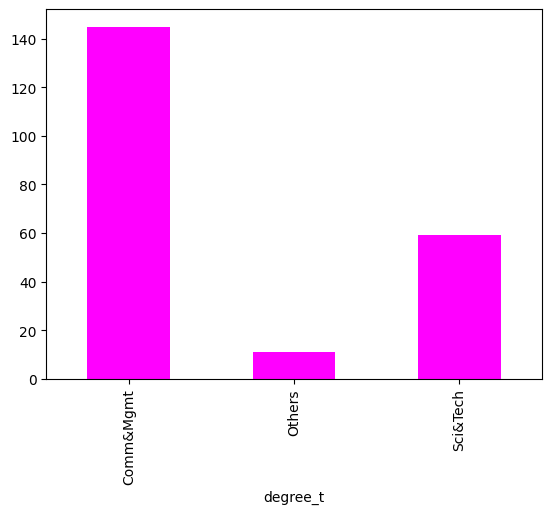

In [27]:
df.groupby(['degree_t'])['status'].count().plot(kind='bar',color='magenta')

<AxesSubplot: xlabel='specialisation'>

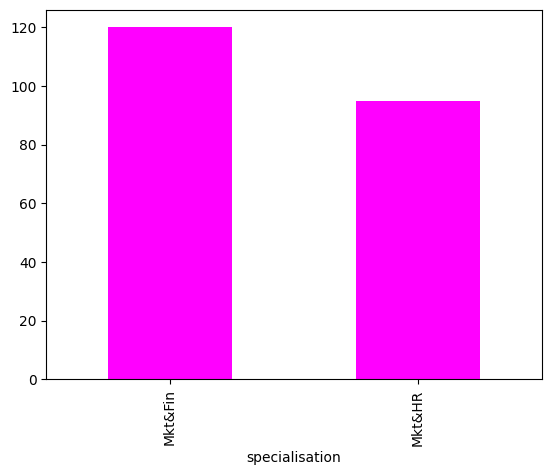

In [28]:
df.groupby(['specialisation'])['status'].count().plot(kind='bar',color='magenta')

In [29]:
df.groupby(['gender'])['status'].count()

gender
F     76
M    139
Name: status, dtype: int64

<AxesSubplot: ylabel='status'>

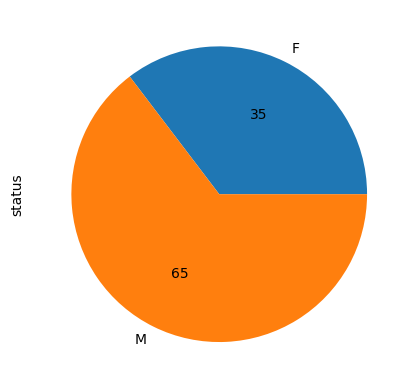

In [30]:
df.groupby(['gender'])['status'].count().plot(kind='pie',autopct='%1.0f')

In [31]:
temp=df[df['gender']=='F']
temp[temp['salary']==max(temp['salary'])]

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
177,178,F,73.0,Central,97.0,Others,Commerce,79.0,Comm&Mgmt,Yes,89.0,Mkt&Fin,70.81,Placed,650000.0


In [32]:
temp=df[df['gender']=='F']
temp[temp['salary']==max(temp['salary'])].style.background_gradient(cmap='plasma')

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
177,178,F,73.000000,Central,97.000000,Others,Commerce,79.000000,Comm&Mgmt,Yes,89.000000,Mkt&Fin,70.810000,Placed,650000.000000


In [33]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.000000
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.000000
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.000000
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,288655.405405
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.000000


In [34]:
df.groupby(['hsc_s'])['status'].count()

hsc_s
Arts         11
Commerce    113
Science      91
Name: status, dtype: int64

<AxesSubplot: ylabel='status'>

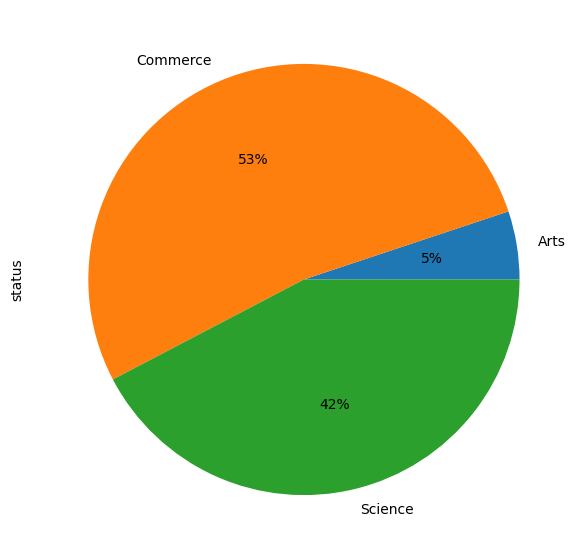

In [35]:
df.groupby(['hsc_s'])['status'].count().plot(kind='pie',autopct='%1.0f%%',figsize=(15,7))

In [36]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.000000
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.000000
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.000000
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,288655.405405
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.000000


In [37]:
for i in getfinaldict.items():
    print(i)
    

('gender', {'M': 139, 'F': 76})
('ssc_b', {'Central': 116, 'Others': 99})
('hsc_b', {'Others': 131, 'Central': 84})
('hsc_s', {'Commerce': 113, 'Science': 91, 'Arts': 11})
('degree_t', {'Comm&Mgmt': 145, 'Sci&Tech': 59, 'Others': 11})
('workex', {'No': 141, 'Yes': 74})
('specialisation', {'Mkt&Fin': 120, 'Mkt&HR': 95})
('status', {'Placed': 148, 'Not Placed': 67})


In [38]:
len(getfinaldict['status']),len(getfinaldict['degree_t'])

(2, 3)

In [39]:
boolcols=[key for key,value in getfinaldict.items() if len(getfinaldict[key])==2]
tripcols=[key for key in list(getfinaldict.keys()) if key not in boolcols]
print(boolcols,tripcols)


['gender', 'ssc_b', 'hsc_b', 'workex', 'specialisation', 'status'] ['hsc_s', 'degree_t']


In [40]:

   

from sklearn.preprocessing import LabelEncoder
getmappings={}
le=LabelEncoder()
for col in list(getfinaldict.keys()):
    df[col]=le.fit_transform(df[col])
    getmappings[col]=dict(zip(le.classes_,le.transform(le.classes_)))

df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1,270000.000000
1,2,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.000000
2,3,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1,250000.000000
3,4,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0,288655.405405
4,5,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1,425000.000000


In [41]:
getmappings

{'gender': {'F': 0, 'M': 1},
 'ssc_b': {'Central': 0, 'Others': 1},
 'hsc_b': {'Central': 0, 'Others': 1},
 'hsc_s': {'Arts': 0, 'Commerce': 1, 'Science': 2},
 'degree_t': {'Comm&Mgmt': 0, 'Others': 1, 'Sci&Tech': 2},
 'workex': {'No': 0, 'Yes': 1},
 'specialisation': {'Mkt&Fin': 0, 'Mkt&HR': 1},
 'status': {'Not Placed': 0, 'Placed': 1}}

In [42]:
df=df.drop(['sl_no'],axis=1)

In [43]:
df.head(8)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,67.00,1,91.00,1,1,58.00,2,0,55.00,1,58.80,1,270000.000000
1,1,79.33,0,78.33,1,2,77.48,2,1,86.50,0,66.28,1,200000.000000
2,1,65.00,0,68.00,0,0,64.00,0,0,75.00,0,57.80,1,250000.000000
3,1,56.00,0,52.00,0,2,52.00,2,0,66.00,1,59.43,0,288655.405405
4,1,85.80,0,73.60,0,1,73.30,0,0,96.80,0,55.50,1,425000.000000
5,1,55.00,1,49.80,1,2,67.25,2,1,55.00,0,51.58,0,288655.405405
6,0,46.00,1,49.20,1,1,79.00,0,0,74.28,0,53.29,0,288655.405405
7,1,82.00,0,64.00,0,2,66.00,2,1,67.00,0,62.14,1,252000.000000


In [44]:
num_var

['sl_no', 'ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']

Distribution plots for col:ssc_p are shown:


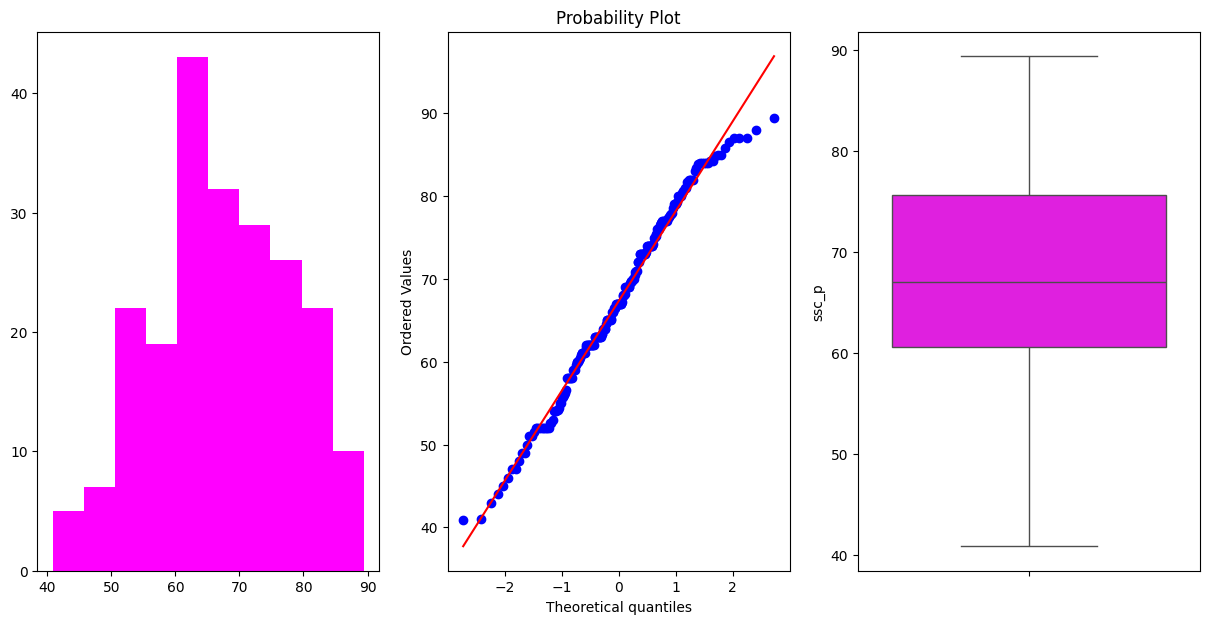

Distribution plots for col:hsc_p are shown:


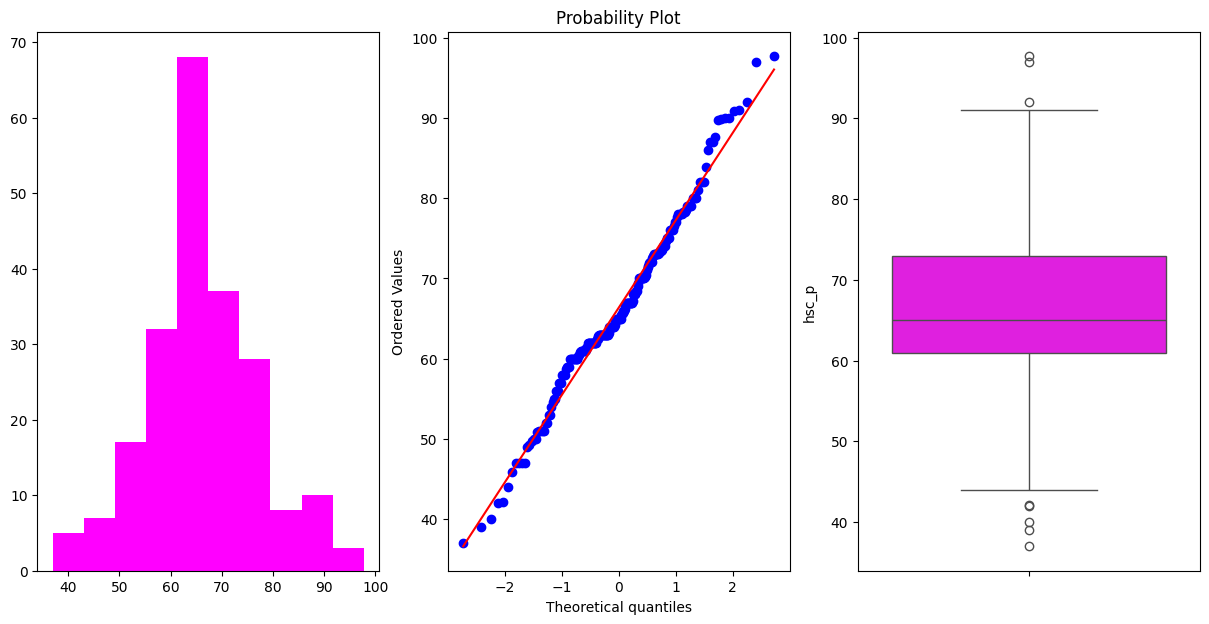

Distribution plots for col:degree_p are shown:


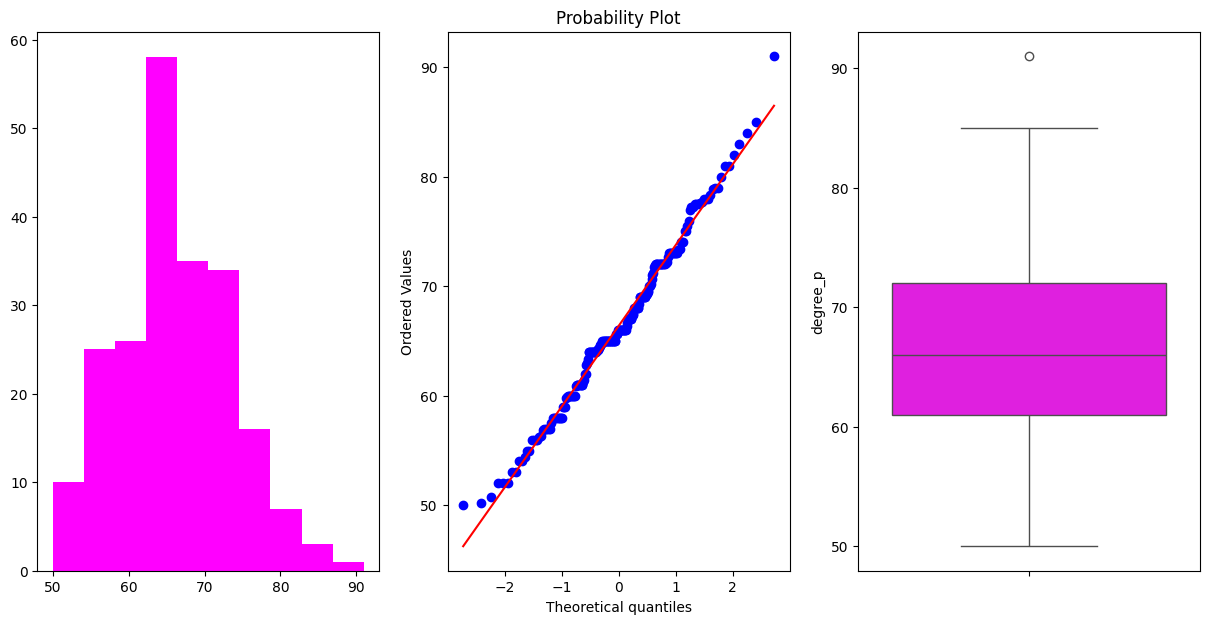

Distribution plots for col:etest_p are shown:


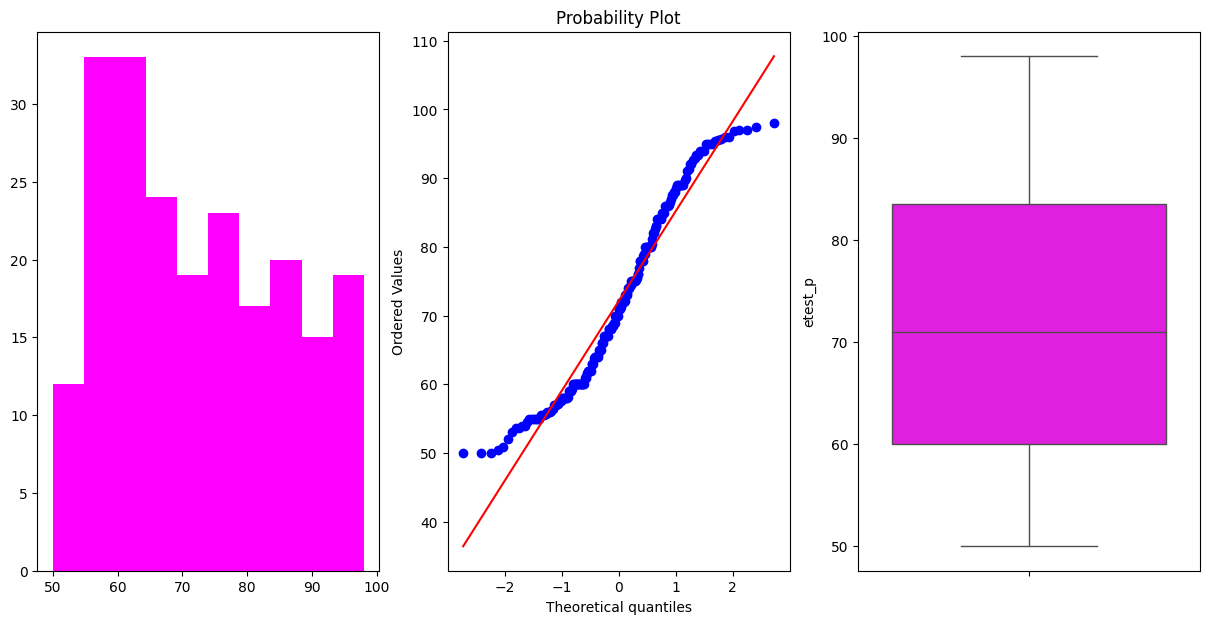

Distribution plots for col:mba_p are shown:


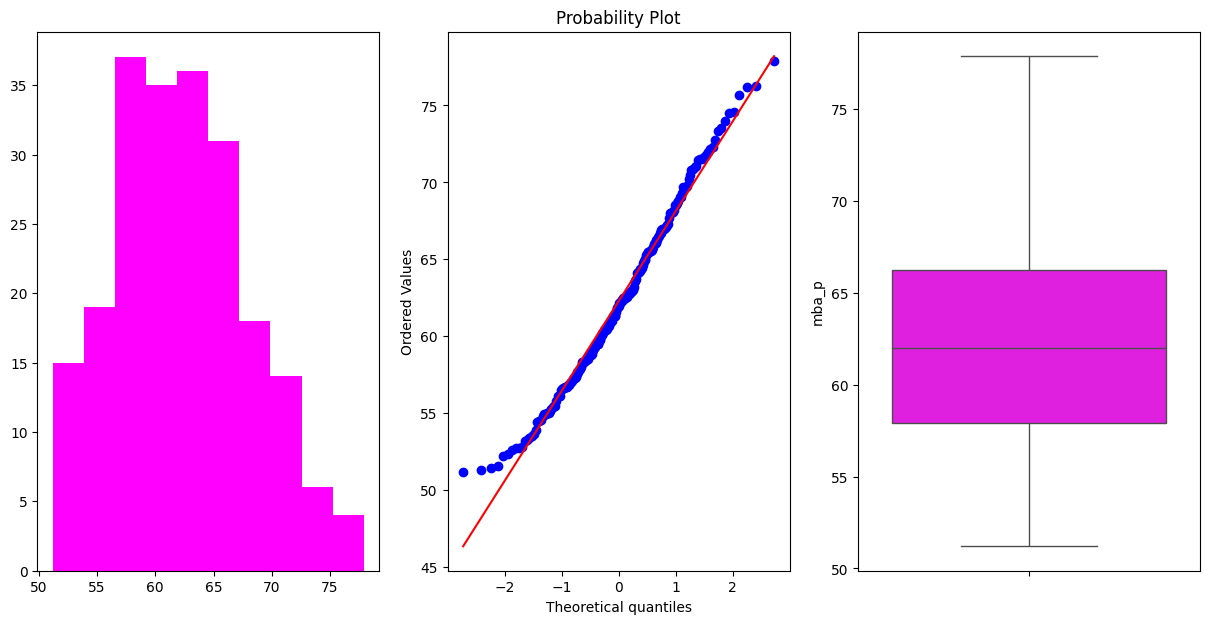

Distribution plots for col:salary are shown:


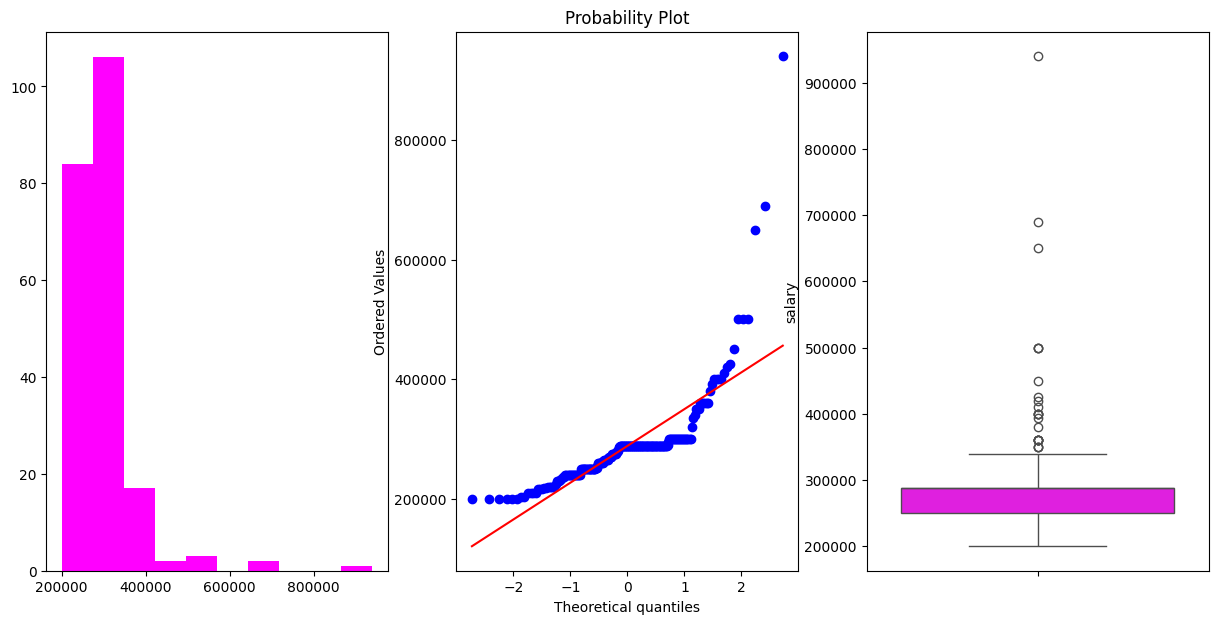

In [45]:
import scipy.stats as stats # plot a normal distribution plot and check if data follows norm dist.

def get_plot(df,col):
    plt.figure(figsize=(15,7))
    plt.subplot(1,3,1)
    plt.hist(df[col],color='magenta')

    plt.subplot(1,3,2)
    stats.probplot(df[col],dist="norm",plot=plt)

    plt.subplot(1,3,3)
    sn.boxplot(df[col],color='magenta')

    plt.show()

for col in num_var[1:]: # 1: because dropped the sl_no
    print(f'Distribution plots for col:{col} are shown:')
    get_plot(df,col)
    print('='*75)

<AxesSubplot: >

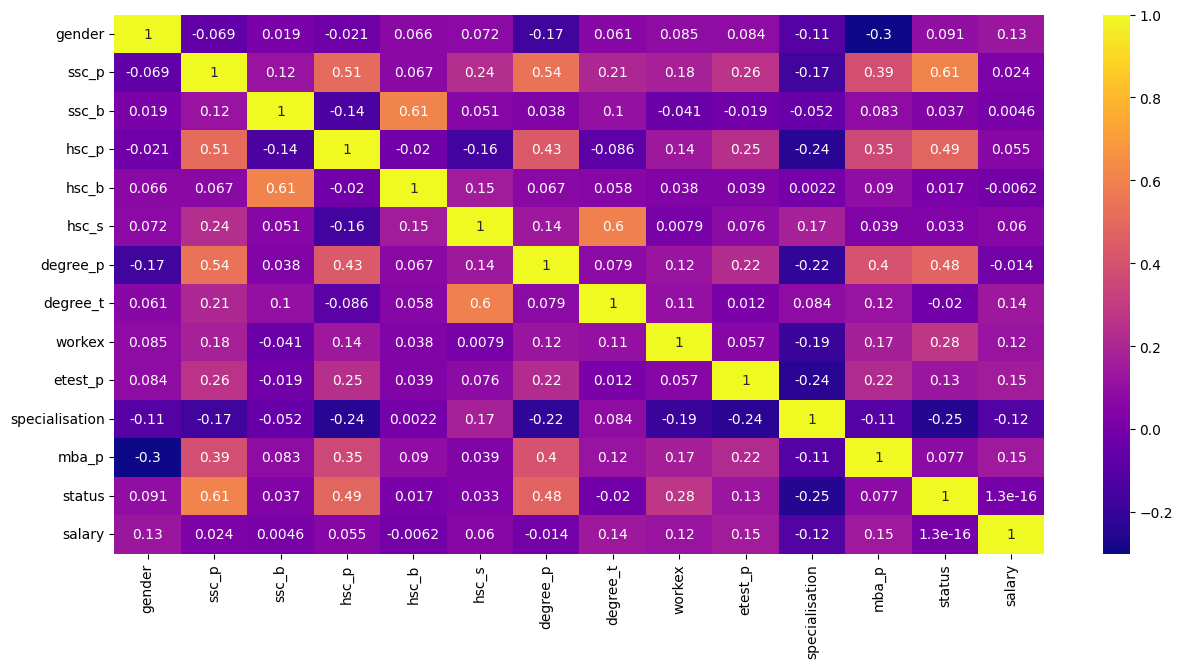

In [46]:
plt.figure(figsize=(15,7))
sn.heatmap(df.corr(),annot=True,cmap='plasma')

In [68]:
# Will drop the salary column as well
#because salary we get to know after getting placed

data=df.copy()
test=data['status']#independent feature , need to predict
train=data.drop(['status','salary'],axis=1)#dependent features
train.head(2)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p
0,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28


In [69]:
from sklearn.ensemble import ExtraTreesClassifier
ec=ExtraTreesClassifier()
ec.fit(train,test)

ExtraTreesClassifier()

<AxesSubplot: >

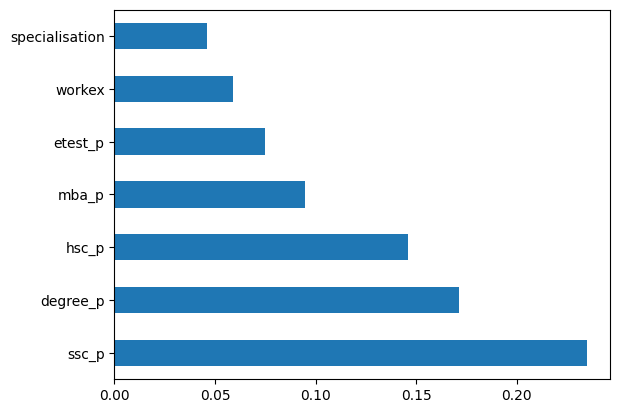

In [70]:
feat_bar=pd.Series(ec.feature_importances_,index=train.columns)
feat_bar.nlargest(7).plot(kind='barh')

<AxesSubplot: >

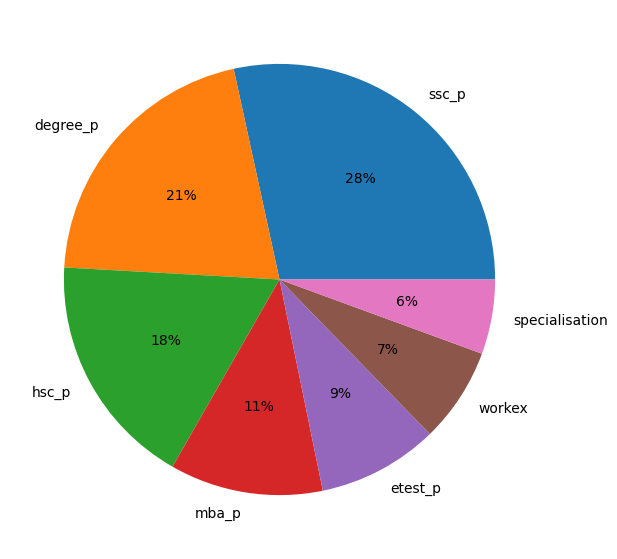

In [71]:
feat_bar.nlargest(7).plot(kind='pie',autopct='%1.0f%%',figsize=(15,7))

<AxesSubplot: >

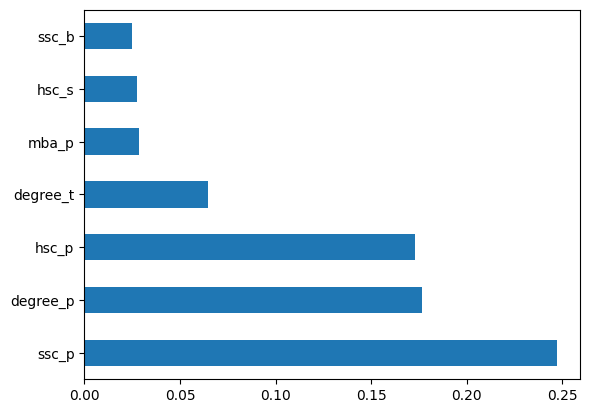

In [72]:
#mutual classification
from sklearn.feature_selection import mutual_info_classif
mc=mutual_info_classif(train,test)
ax=pd.Series(mc,index=train.columns)
ax.nlargest(7).plot(kind='barh')

<AxesSubplot: >

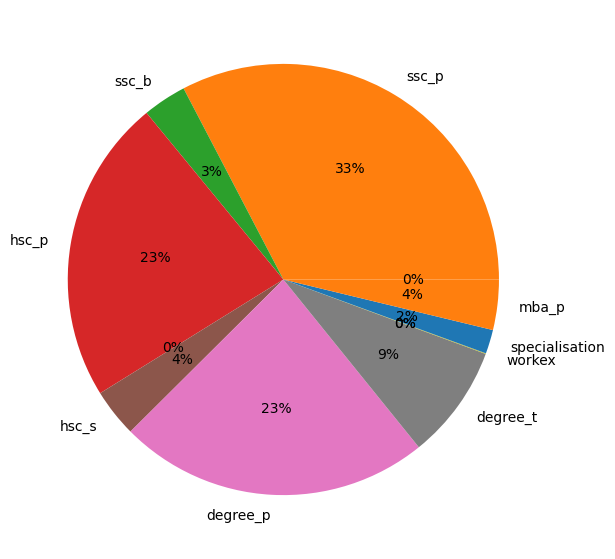

In [73]:
pd.Series(mc,index=train.columns).plot(kind='pie',autopct='%1.0f%%',figsize=(15,7))

In [74]:
#selecting the top 10 contributing features in both cases 
#and then doing intersection and getting atleast 5 top

feat_col=list(feat_bar.nlargest(10).index)
mutclassif=list(ax.nlargest(10).index)

commoncols=list(set(feat_col).intersection(set(mutclassif)))
print(commoncols)

['degree_t', 'ssc_b', 'degree_p', 'ssc_p', 'gender', 'specialisation', 'hsc_p', 'mba_p', 'workex']


In [75]:
train=df[commoncols]
train.head()

,degree_t,ssc_b,degree_p,ssc_p,gender,specialisation,hsc_p,mba_p,workex
0,2,1,58.00,67.00,1,1,91.00,58.80,0
1,2,0,77.48,79.33,1,0,78.33,66.28,1
2,0,0,64.00,65.00,1,0,68.00,57.80,0
3,2,0,52.00,56.00,1,1,52.00,59.43,0
4,0,0,73.30,85.80,1,0,73.60,55.50,0


In [76]:
getmappings

{'gender': {'F': 0, 'M': 1},
 'ssc_b': {'Central': 0, 'Others': 1},
 'hsc_b': {'Central': 0, 'Others': 1},
 'hsc_s': {'Arts': 0, 'Commerce': 1, 'Science': 2},
 'degree_t': {'Comm&Mgmt': 0, 'Others': 1, 'Sci&Tech': 2},
 'workex': {'No': 0, 'Yes': 1},
 'specialisation': {'Mkt&Fin': 0, 'Mkt&HR': 1},
 'status': {'Not Placed': 0, 'Placed': 1}}

In [77]:
train=train[['ssc_p', 'gender', 'degree_p', 'degree_t', 'specialisation', 'workex', 'hsc_p', 'mba_p']]
train.columns=[['SSC_p', 'Gender', 'Degree_p', 'Technical_Degree', 'Specialisation', 'WorkExperience', 'HighSchool_p', 'MBA_p']]
train.head()

,SSC_p,Gender,Degree_p,Technical_Degree,Specialisation,WorkExperience,HighSchool_p,MBA_p
0,67.00,1,58.00,2,1,0,91.00,58.80
1,79.33,1,77.48,2,0,1,78.33,66.28
2,65.00,1,64.00,0,0,0,68.00,57.80
3,56.00,1,52.00,2,1,0,52.00,59.43
4,85.80,1,73.30,0,0,0,73.60,55.50


In [78]:
train['Technical_Degree'].value_counts()

(Technical_Degree,)
0                      145
2                       59
1                       11
dtype: int64

In [79]:
train.head()

,SSC_p,Gender,Degree_p,Technical_Degree,Specialisation,WorkExperience,HighSchool_p,MBA_p
0,67.00,1,58.00,2,1,0,91.00,58.80
1,79.33,1,77.48,2,0,1,78.33,66.28
2,65.00,1,64.00,0,0,0,68.00,57.80
3,56.00,1,52.00,2,1,0,52.00,59.43
4,85.80,1,73.30,0,0,0,73.60,55.50


In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split,RandomizedSearchCV,cross_val_score
from sklearn import metrics


X_train,X_test,y_train,y_test=train_test_split(train,test,test_size=0.2)
X_train.shape,X_test.shape

((172, 8), (43, 8))

[Text(0.5491071428571429, 0.95, "('SSC_p',) <= 64.3\ngini = 0.439\nsamples = 172\nvalue = [56.0, 116.0]\nclass = Placed"),
 Text(0.2767857142857143, 0.85, "('HighSchool_p',) <= 58.5\ngini = 0.47\nsamples = 74\nvalue = [46, 28]\nclass = Not_placed"),
 Text(0.24107142857142858, 0.75, 'gini = 0.0\nsamples = 23\nvalue = [23, 0]\nclass = Not_placed'),
 Text(0.3125, 0.75, "('SSC_p',) <= 55.34\ngini = 0.495\nsamples = 51\nvalue = [23.0, 28.0]\nclass = Placed"),
 Text(0.14285714285714285, 0.65, "('Technical_Degree',) <= 1.5\ngini = 0.355\nsamples = 13\nvalue = [10, 3]\nclass = Not_placed"),
 Text(0.07142857142857142, 0.55, "('MBA_p',) <= 54.305\ngini = 0.18\nsamples = 10\nvalue = [9, 1]\nclass = Not_placed"),
 Text(0.03571428571428571, 0.45, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Placed'),
 Text(0.10714285714285714, 0.45, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]\nclass = Not_placed'),
 Text(0.21428571428571427, 0.55, "('MBA_p',) <= 56.375\ngini = 0.444\nsamples = 3\nvalue = [1, 2]\n

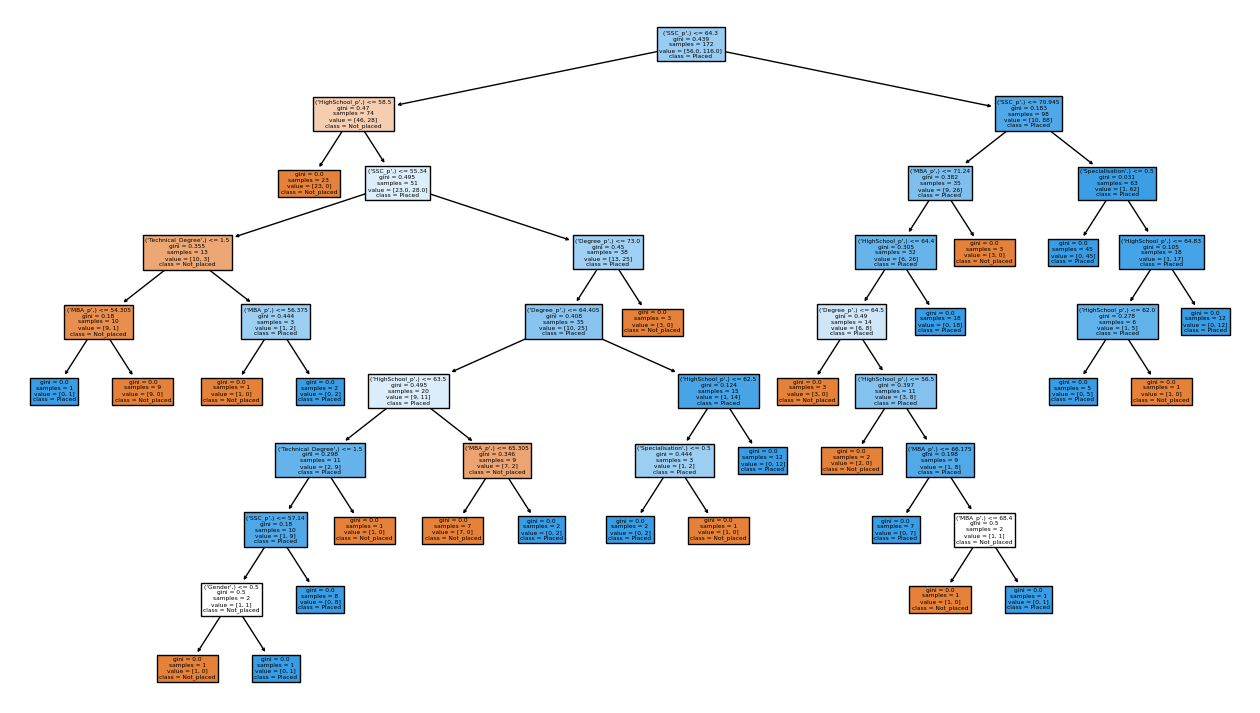

In [81]:
dc=DecisionTreeClassifier()
dc.fit(X_train,y_train)
plt.figure(figsize=(16,9))
tree.plot_tree(dc,filled=True,class_names=['Not_placed','Placed'],feature_names=train.columns)


In [82]:
costpath=dc.cost_complexity_pruning_path(train,test)
ccp_alpha,impurities=costpath.ccp_alphas,costpath.impurities

In [83]:
modellist=[]
for alpha in ccp_alpha:
    dc=DecisionTreeClassifier(ccp_alpha=alpha)
    dc.fit(X_train,y_train)
    modellist.append(dc)

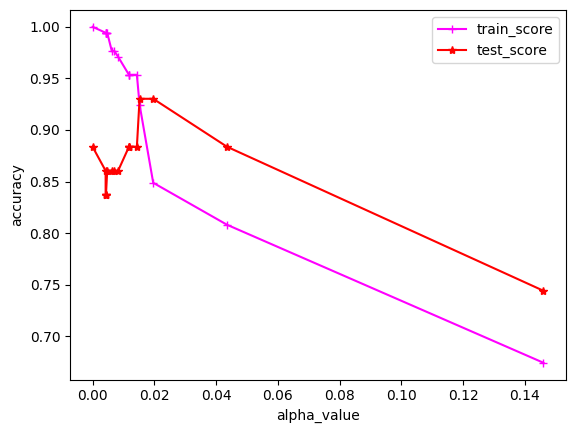

In [84]:
train_score=[clf.score(X_train,y_train) for clf in modellist]
test_score=[clf.score(X_test,y_test) for clf in modellist]

plt.xlabel('alpha_value')
plt.ylabel('accuracy')
plt.plot(ccp_alpha,train_score,label='train_score',marker='+',color='magenta')
plt.plot(ccp_alpha,test_score,label='test_score',marker='*',color='red')
plt.legend()
plt.show()

[Text(0.6, 0.875, "('SSC_p',) <= 64.3\ngini = 0.439\nsamples = 172\nvalue = [56.0, 116.0]\nclass = Placed"),
 Text(0.4, 0.625, "('HighSchool_p',) <= 58.5\ngini = 0.47\nsamples = 74\nvalue = [46, 28]\nclass = Not_placed"),
 Text(0.2, 0.375, 'gini = 0.0\nsamples = 23\nvalue = [23, 0]\nclass = Not_placed'),
 Text(0.6, 0.375, "('SSC_p',) <= 55.34\ngini = 0.495\nsamples = 51\nvalue = [23.0, 28.0]\nclass = Placed"),
 Text(0.4, 0.125, 'gini = 0.355\nsamples = 13\nvalue = [10, 3]\nclass = Not_placed'),
 Text(0.8, 0.125, 'gini = 0.45\nsamples = 38\nvalue = [13, 25]\nclass = Placed'),
 Text(0.8, 0.625, 'gini = 0.183\nsamples = 98\nvalue = [10, 88]\nclass = Placed')]

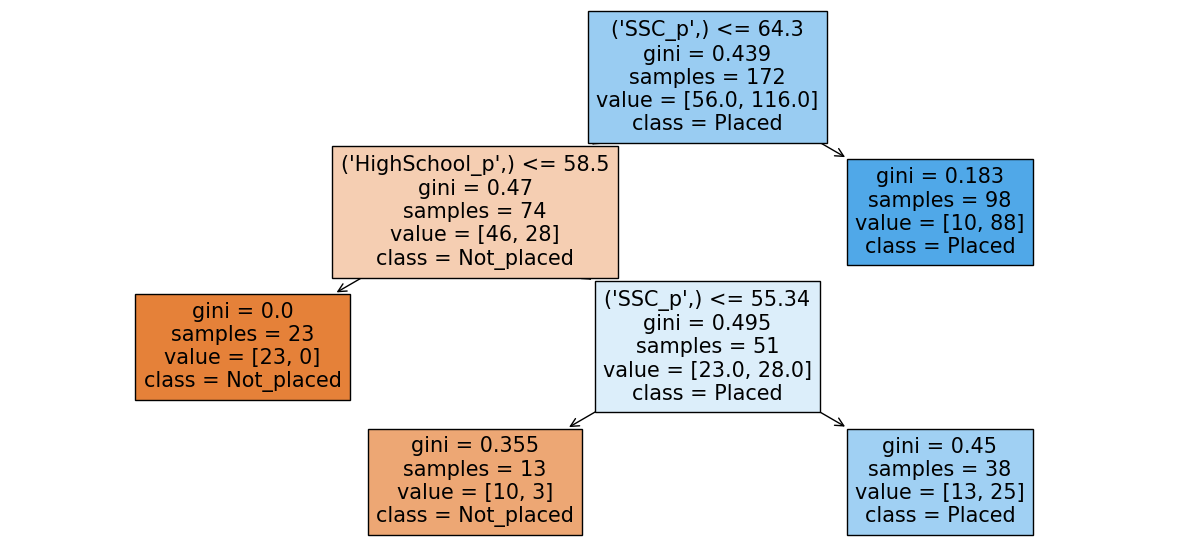

In [85]:
dc=DecisionTreeClassifier(ccp_alpha=0.0195)
dc.fit(X_train,y_train)
plt.figure(figsize=(15,7))
tree.plot_tree(dc,filled=True,class_names=['Not_placed','Placed'],feature_names=train.columns)

In [86]:
params={
    'RandomForest':{
        'model':RandomForestClassifier(),
        'params':{
            'n_estimators':[int(x) for x in np.linspace(start=1,stop=1200,num=10)],
            'max_depth':[int(x) for x in np.linspace(start=1,stop=30,num=5)],
            'min_samples_split':[2,5,10,12],
            'min_samples_leaf':[2,5,10,12],
            'max_features':['auto','sqrt'],
            'ccp_alpha':[0.0185,0.0190,0.0195,0.0200],
        }
    },
    'logistic':{
        'model':LogisticRegression(),
        'params':{
            'penalty':['l1','l2','elasticnet'],
            'C':[0.25,0.50,0.75,1.0],
            'tol':[1e-10,1e-5,1e-4,1e-3,0.025,0.25,0.50],
            'solver':['lbfs','liblinear','saga','newton-cg'],
            'multi_class':['auto','ovr','multinomial'],
            'max_iter':[int(x) for x in np.linspace(start=1,stop=250,num=10)],
             
        }
    },
    'D-tree':{
        'model':DecisionTreeClassifier(),
        'params':{
            'criterion':['gini','entropy'],
            'splitter':['best','random'],
            'min_samples_split':[1,2,5,10,12],
            'min_samples_leaf':[1,2,5,10,12],
            'max_features':['auto','sqrt'],
            'ccp_alpha':[0.0185,0.0190,0.0195,0.0200],
        }
    },
    'SVM':{
        'model':SVC(),
        'params':{
            'C':[0.25,0.50,0.75,1.0],
            'tol':[1e-10,1e-5,1e-4,0.025,0.50,0.75],
            'kernel':['linear','poly','sigmoid','rbf'],
            'max_iter':[int(x) for x in np.linspace(start=1,stop=250,num=10)],
        }
    }

}
    

In [87]:
scores=[]
for model_name,mp in params.items():
    clf=RandomizedSearchCV(mp['model'],param_distributions=mp['params'],cv=5,n_iter=10,n_jobs=-1,scoring='accuracy')
    clf.fit(X_train,y_train)
    scores.append({
        'model_name':model_name,
        'best_score':clf.best_score_,
        'best_estimator':clf.best_estimator_
    })

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
45 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
11 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/s

In [88]:
scores_df=pd.DataFrame(data=scores,columns=['model_name','best_score','best_estimator'])
scores_df.head()

,model_name,best_score,best_estimator
0,RandomForest,0.802521,"(DecisionTreeClassifier(ccp_alpha=0.0195, max_..."
1,logistic,0.848739,"LogisticRegression(C=0.25, max_iter=250, solve..."
2,D-tree,0.784202,"DecisionTreeClassifier(ccp_alpha=0.0195, max_f..."
3,SVM,0.814118,"SVC(C=0.5, max_iter=222, tol=1e-05)"


In [89]:
scores

[{'model_name': 'RandomForest',
  'best_score': 0.8025210084033614,
  'best_estimator': RandomForestClassifier(ccp_alpha=0.0195, max_depth=15, min_samples_leaf=5,
                         min_samples_split=12, n_estimators=533)},
 {'model_name': 'logistic',
  'best_score': 0.8487394957983192,
  'best_estimator': LogisticRegression(C=0.25, max_iter=250, solver='newton-cg', tol=0.025)},
 {'model_name': 'D-tree',
  'best_score': 0.7842016806722689,
  'best_estimator': DecisionTreeClassifier(ccp_alpha=0.0195, max_features='sqrt',
                         min_samples_split=5)},
 {'model_name': 'SVM',
  'best_score': 0.8141176470588235,
  'best_estimator': SVC(C=0.5, max_iter=222, tol=1e-05)}]

In [90]:
# Random Forest gives best accuracay

In [91]:
rf=RandomForestClassifier(  ccp_alpha=0.02, max_depth=22, min_samples_leaf=2,
                         n_estimators=400)
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred))

0.9302325581395349


In [92]:
train

,SSC_p,Gender,Degree_p,Technical_Degree,Specialisation,WorkExperience,HighSchool_p,MBA_p
0,67.00,1,58.00,2,1,0,91.00,58.80
1,79.33,1,77.48,2,0,1,78.33,66.28
2,65.00,1,64.00,0,0,0,68.00,57.80
3,56.00,1,52.00,2,1,0,52.00,59.43
4,85.80,1,73.30,0,0,0,73.60,55.50
...,...,...,...,...,...,...,...,...
210,80.60,1,77.60,0,0,0,82.00,74.49
211,58.00,1,72.00,2,0,0,60.00,53.62
212,67.00,1,73.00,0,0,1,67.00,69.72
213,74.00,0,58.00,0,1,0,66.00,60.23


In [93]:
traindata=np.array(train)
predicted=[]
for i in range(len(traindata)):
    predicted.append(rf.predict([traindata[i]]))

predicted

[array([1]),
 array([1]),
 array([1]),
 array([0]),
 array([1]),
 array([0]),
 array([0]),
 array([1]),
 array([1]),
 array([0]),
 array([1]),
 array([1]),
 array([0]),
 array([1]),
 array([0]),
 array([1]),
 array([1]),
 array([0]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([0]),
 array([1]),
 array([1]),
 array([1]),
 array([0]),
 array([1]),
 array([0]),
 array([1]),
 array([1]),
 array([0]),
 array([1]),
 array([0]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([0]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([0]),
 array([1]),
 array([0]),
 array([0]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([0]),
 array([1]),
 array([1]),
 array([0]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),

In [94]:
resultdf=train.copy()
resultdf['Actual']=np.array(test)
resultdf['Predicted']=np.array(predicted)
resultdf.head()

,SSC_p,Gender,Degree_p,Technical_Degree,Specialisation,WorkExperience,HighSchool_p,MBA_p,Actual,Predicted
0,67.00,1,58.00,2,1,0,91.00,58.80,1,1
1,79.33,1,77.48,2,0,1,78.33,66.28,1,1
2,65.00,1,64.00,0,0,0,68.00,57.80,1,1
3,56.00,1,52.00,2,1,0,52.00,59.43,0,0
4,85.80,1,73.30,0,0,0,73.60,55.50,1,1


In [95]:
resultdf['Actual'].value_counts()

(Actual,)
1            148
0             67
dtype: int64

In [96]:
resultdf['Predicted'].value_counts()

(Predicted,)
1               164
0                51
dtype: int64

In [97]:
getmappings

{'gender': {'F': 0, 'M': 1},
 'ssc_b': {'Central': 0, 'Others': 1},
 'hsc_b': {'Central': 0, 'Others': 1},
 'hsc_s': {'Arts': 0, 'Commerce': 1, 'Science': 2},
 'degree_t': {'Comm&Mgmt': 0, 'Others': 1, 'Sci&Tech': 2},
 'workex': {'No': 0, 'Yes': 1},
 'specialisation': {'Mkt&Fin': 0, 'Mkt&HR': 1},
 'status': {'Not Placed': 0, 'Placed': 1}}

In [98]:
traindata=np.array(train)
predicted=[]
for i in range(len(traindata)):
    predicted.append(rf.predict_proba([traindata[i]]))

predicted

[array([[0.38397677, 0.61602323]]),
 array([[0.07357756, 0.92642244]]),
 array([[0.18486288, 0.81513712]]),
 array([[0.89354092, 0.10645908]]),
 array([[0.08344962, 0.91655038]]),
 array([[0.71098086, 0.28901914]]),
 array([[0.7335866, 0.2664134]]),
 array([[0.08112047, 0.91887953]]),
 array([[0.08212005, 0.91787995]]),
 array([[0.557601, 0.442399]]),
 array([[0.40697454, 0.59302546]]),
 array([[0.0857493, 0.9142507]]),
 array([[0.82890498, 0.17109502]]),
 array([[0.26789071, 0.73210929]]),
 array([[0.81795596, 0.18204404]]),
 array([[0.11566127, 0.88433873]]),
 array([[0.17536229, 0.82463771]]),
 array([[0.60347544, 0.39652456]]),
 array([[0.49961193, 0.50038807]]),
 array([[0.17635419, 0.82364581]]),
 array([[0.19408049, 0.80591951]]),
 array([[0.0896927, 0.9103073]]),
 array([[0.22912275, 0.77087725]]),
 array([[0.1212264, 0.8787736]]),
 array([[0.09893514, 0.90106486]]),
 array([[0.77168715, 0.22831285]]),
 array([[0.07718608, 0.92281392]]),
 array([[0.18248246, 0.81751754]]),
 arr

In [99]:
resultdf['Prob_not_getting_placed']=np.array([predicted[i][0][0] for i in range(len(predicted))])
resultdf['Prob_getting_placed']=np.array([predicted[i][0][1] for i in range(len(predicted))])
resultdf

,SSC_p,Gender,Degree_p,Technical_Degree,Specialisation,WorkExperience,HighSchool_p,MBA_p,Actual,Predicted,Prob_not_getting_placed,Prob_getting_placed
0,67.00,1,58.00,2,1,0,91.00,58.80,1,1,0.383977,0.616023
1,79.33,1,77.48,2,0,1,78.33,66.28,1,1,0.073578,0.926422
2,65.00,1,64.00,0,0,0,68.00,57.80,1,1,0.184863,0.815137
3,56.00,1,52.00,2,1,0,52.00,59.43,0,0,0.893541,0.106459
4,85.80,1,73.30,0,0,0,73.60,55.50,1,1,0.083450,0.916550
...,...,...,...,...,...,...,...,...,...,...,...,...
210,80.60,1,77.60,0,0,0,82.00,74.49,1,1,0.102492,0.897508
211,58.00,1,72.00,2,0,0,60.00,53.62,1,1,0.269080,0.730920
212,67.00,1,73.00,0,0,1,67.00,69.72,1,1,0.107779,0.892221
213,74.00,0,58.00,0,1,0,66.00,60.23,1,1,0.377597,0.622403


In [102]:
import pickle

file=open('campusplacementpredictor.pkl','wb')
pickle.dump(rf,file)
file.close()

In [103]:
print(X_test)

     SSC_p Gender Degree_p Technical_Degree Specialisation WorkExperience  \
87   59.60      1    60.00                1              1              0   
147  70.00      1    65.00                0              0              0   
157  66.50      1    60.90                0              0              0   
122  66.50      0    69.30                0              0              1   
148  77.00      0    56.00                1              0              0   
77   64.00      1    65.00                2              0              1   
51   54.40      1    56.20                0              1              0   
38   73.00      0    66.00                0              1              0   
72   84.86      1    78.00                0              0              0   
174  73.24      1    64.27                2              0              1   
199  69.00      1    57.00                0              1              0   
133  73.00      1    77.00                0              1              1   